# Interest Rates Analysis
This notebook analyzes different interest rates (Federal Funds Rate, 1-Year Treasury Rate, and 10-Year Treasury Rate) from 2015 to 2024.

## Setup
Import required libraries and set visualization styles.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



## Data Loading and Preprocessing
Load the cleaned data files and convert dates to datetime format.

In [6]:
# Load the cleaned data
federal_funds = pd.read_csv('../data/cleaned_Federal_Funds_Rate.csv')
treasury_1y = pd.read_csv('../data/cleaned_1_Year_Treasury_Rate.csv')
treasury_10y = pd.read_csv('../data/cleaned_10_Year_Treasury_Rate.csv')

# Convert Original_Value to datetime
federal_funds['Original_Value'] = pd.to_datetime(federal_funds['Original_Value'])
treasury_1y['Original_Value'] = pd.to_datetime(treasury_1y['Original_Value'])
treasury_10y['Original_Value'] = pd.to_datetime(treasury_10y['Original_Value'])


In [7]:
# Calculate descriptive statistics for each rate
def calculate_statistics(data, rate_name):
    stats_dict = {
        'Rate': rate_name,
        'Mean': data['Rate'].mean(),
        'Median': data['Rate'].median(),
        'Std Dev': data['Rate'].std(),
        'Min': data['Rate'].min(),
        'Max': data['Rate'].max(),
        'Range': data['Rate'].max() - data['Rate'].min(),
        'Skewness': stats.skew(data['Rate']),
        'Kurtosis': stats.kurtosis(data['Rate'])
    }
    return pd.Series(stats_dict)

statistics = pd.DataFrame([
    calculate_statistics(federal_funds, 'Federal Funds Rate'),
    calculate_statistics(treasury_10y, '1-Year Treasury Rate'),
    calculate_statistics(treasury_1y, '10-Year Treasury Rate')
])

print('\nDescriptive Statistics:')
print('======================\n')
print(statistics.round(4).to_string())


Descriptive Statistics:

                    Rate    Mean  Median  Std Dev   Min   Max  Range  Skewness  Kurtosis
0     Federal Funds Rate  1.8036    1.16   1.8798  0.05  5.33   5.28    0.8641   -0.7230
1   1-Year Treasury Rate  2.4993    2.32   1.0654  0.62  4.80   4.18    0.3404   -0.7105
2  10-Year Treasury Rate  1.9749    1.53   1.7937  0.05  5.44   5.39    0.6754   -0.9716


## Time Series Visualization
Create a time series plot comparing all three interest rates over time.

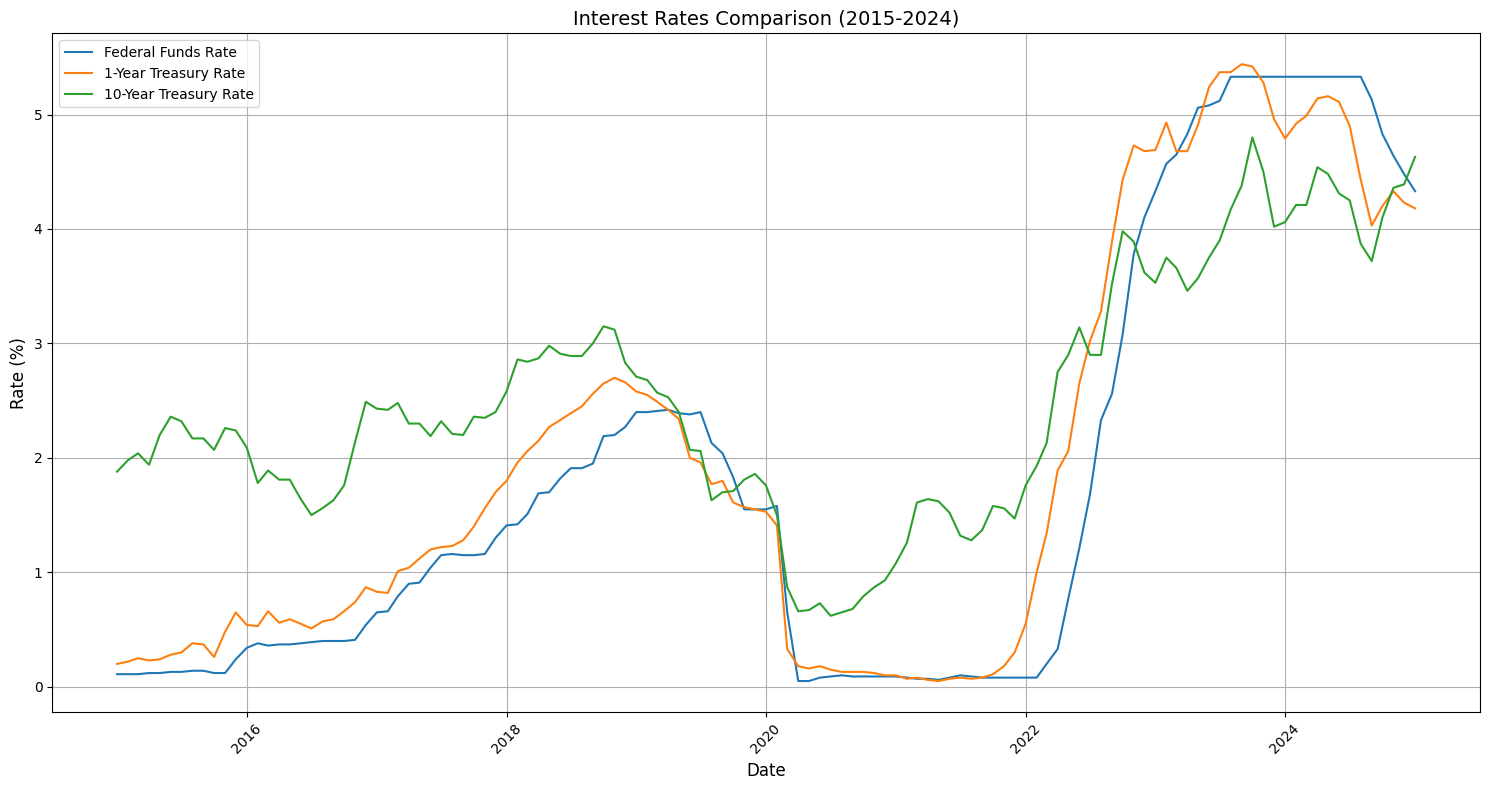

In [8]:
# Create a time series plot
plt.figure(figsize=(15, 8))

plt.plot(federal_funds['Original_Value'], federal_funds['Rate'], label='Federal Funds Rate')
plt.plot(treasury_1y['Original_Value'], treasury_1y['Rate'], label='1-Year Treasury Rate')
plt.plot(treasury_10y['Original_Value'], treasury_10y['Rate'], label='10-Year Treasury Rate')

plt.title('Interest Rates Comparison (2015-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('interest_rates_comparison.png')
plt.show()


## Statistical Analysis
Calculate and display basic statistical measures for each interest rate.

In [9]:
# Calculate basic statistics
def print_statistics(data, rate_name):
    print(f'{rate_name} Statistics:')
    print(f'Mean Rate: {data["Rate"].mean():.2f}%')
    print(f'Median Rate: {data["Rate"].median():.2f}%')
    print(f'Standard Deviation: {data["Rate"].std():.2f}')
    print(f'Min Rate: {data["Rate"].min():.2f}%')
    print(f'Max Rate: {data["Rate"].max():.2f}%')

print_statistics(federal_funds, 'Federal Funds')
print_statistics(treasury_1y, '1-Year Treasury')
print_statistics(treasury_10y, '10-Year Treasury')


Federal Funds Statistics:
Mean Rate: 1.80%
Median Rate: 1.16%
Standard Deviation: 1.88
Min Rate: 0.05%
Max Rate: 5.33%
1-Year Treasury Statistics:
Mean Rate: 1.97%
Median Rate: 1.53%
Standard Deviation: 1.79
Min Rate: 0.05%
Max Rate: 5.44%
10-Year Treasury Statistics:
Mean Rate: 2.50%
Median Rate: 2.32%
Standard Deviation: 1.07
Min Rate: 0.62%
Max Rate: 4.80%


## Correlation Analysis
Visualize the correlations between different interest rates using a heatmap.

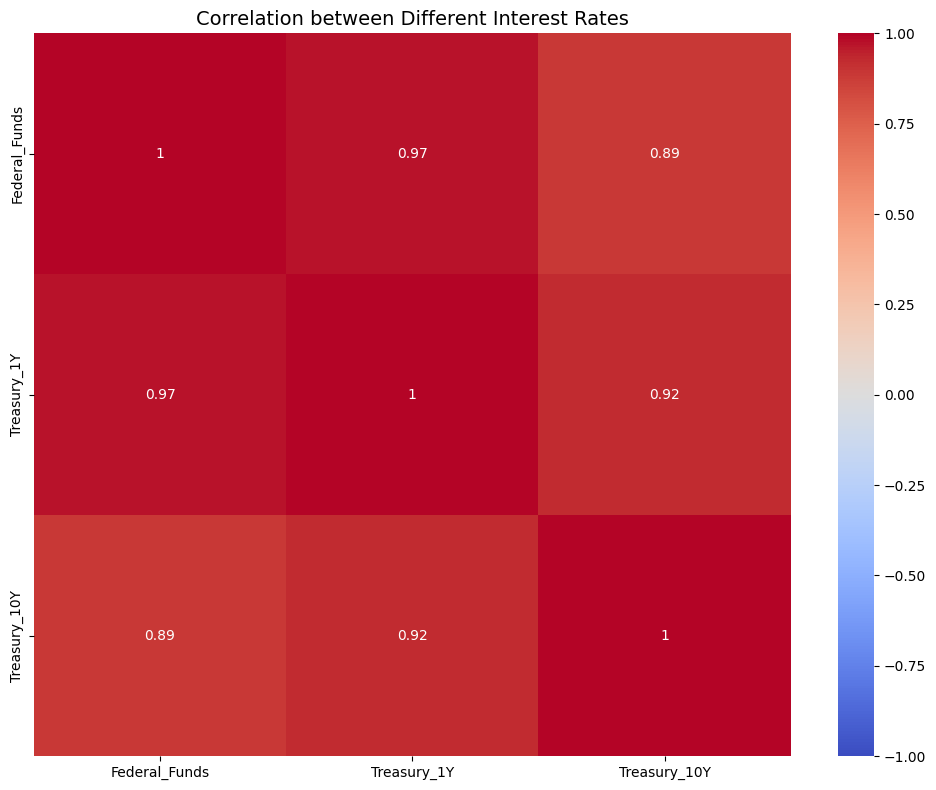

In [10]:
# Calculate correlations between rates
correlations = pd.DataFrame({
    'Federal_Funds': federal_funds['Rate'],
    'Treasury_1Y': treasury_1y['Rate'],
    'Treasury_10Y': treasury_10y['Rate']
})

plt.figure(figsize=(10, 8))
sns.heatmap(correlations.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between Different Interest Rates', fontsize=14)
plt.tight_layout()
plt.show()


## Spread Analysis

Average Spreads:
10Y - 1Y Treasury: 0.52%
10Y Treasury - Fed Funds: 0.70%
1Y Treasury - Fed Funds: 0.17%


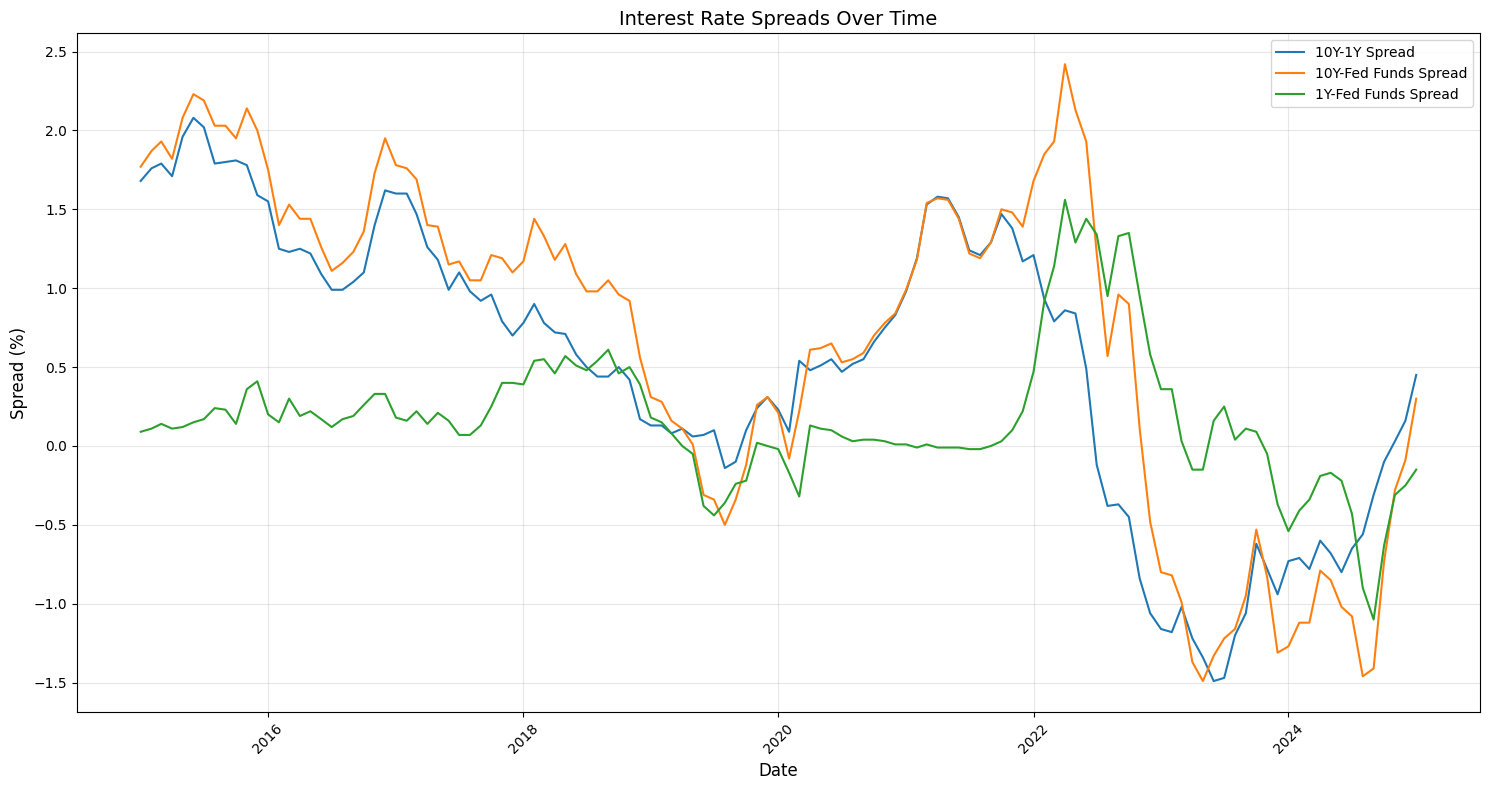

In [11]:
# Calculate average spreads
spread_10y_1y = (treasury_10y['Rate'] - treasury_1y['Rate']).mean()
spread_10y_fed = (treasury_10y['Rate'] - federal_funds['Rate']).mean()
spread_1y_fed = (treasury_1y['Rate'] - federal_funds['Rate']).mean()

print('Average Spreads:')
print(f'10Y - 1Y Treasury: {spread_10y_1y:.2f}%')
print(f'10Y Treasury - Fed Funds: {spread_10y_fed:.2f}%')
print(f'1Y Treasury - Fed Funds: {spread_1y_fed:.2f}%')

# Visualize spreads over time
plt.figure(figsize=(15, 8))
plt.plot(treasury_10y['Original_Value'], 
         treasury_10y['Rate'] - treasury_1y['Rate'], 
         label='10Y-1Y Spread')
plt.plot(treasury_10y['Original_Value'], 
         treasury_10y['Rate'] - federal_funds['Rate'], 
         label='10Y-Fed Funds Spread')
plt.plot(treasury_1y['Original_Value'], 
         treasury_1y['Rate'] - federal_funds['Rate'], 
         label='1Y-Fed Funds Spread')

plt.title('Interest Rate Spreads Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Spread (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Key Period Analysis

In [12]:
# Identify extreme periods
max_fed_rate = federal_funds.loc[federal_funds['Rate'].idxmax()]
min_fed_rate = federal_funds.loc[federal_funds['Rate'].idxmin()]

print('Notable Periods:')
print(f'Highest Federal Funds Rate: {max_fed_rate["Rate"]}% ({max_fed_rate["Original_Value"]})')
print(f'Lowest Federal Funds Rate: {min_fed_rate["Rate"]}% ({min_fed_rate["Original_Value"]})')

# Calculate and display the periods of largest spread changes
spreads = pd.DataFrame({
    '10Y-1Y Spread': treasury_10y['Rate'] - treasury_1y['Rate'],
    '10Y-Fed Spread': treasury_10y['Rate'] - federal_funds['Rate'],
    '1Y-Fed Spread': treasury_1y['Rate'] - federal_funds['Rate']
})

print('Maximum Spreads:')
for column in spreads.columns:
    max_spread = spreads[column].max()
    max_date = federal_funds['Original_Value'].iloc[spreads[column].idxmax()]
    print(f'{column}: {max_spread:.2f}% ({max_date})')

Notable Periods:
Highest Federal Funds Rate: 5.33% (2023-08-01 00:00:00)
Lowest Federal Funds Rate: 0.05% (2020-04-01 00:00:00)
Maximum Spreads:
10Y-1Y Spread: 2.08% (2015-06-01 00:00:00)
10Y-Fed Spread: 2.42% (2022-04-01 00:00:00)
1Y-Fed Spread: 1.56% (2022-04-01 00:00:00)


## Year-over-Year Analysis
Calculate and visualize the year-over-year changes in interest rates.

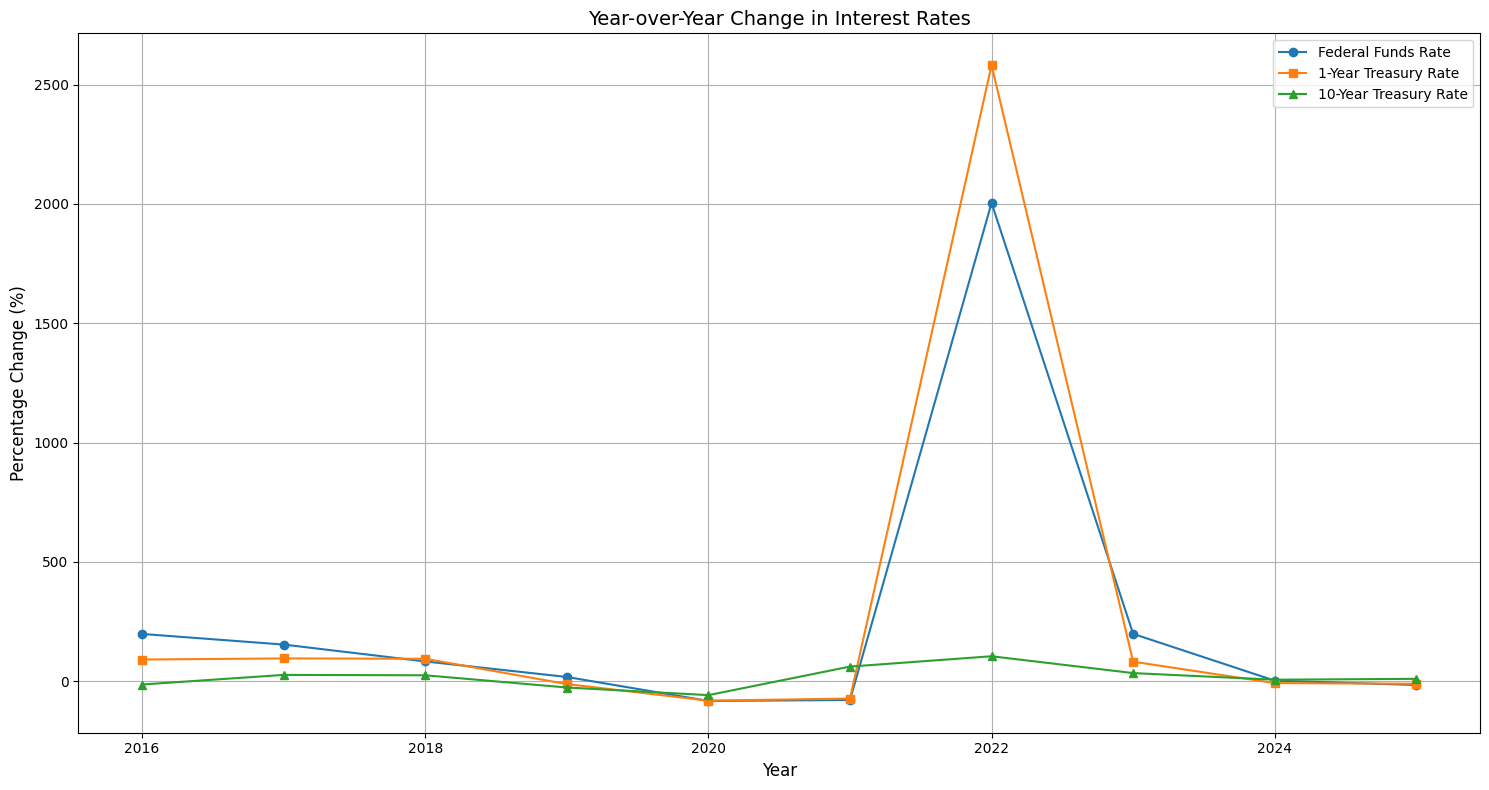

In [13]:
# Calculate year-over-year changes
def calculate_yoy_change(data):
    yearly_avg = data.groupby('Year')['Rate'].mean()
    return yearly_avg.pct_change() * 100

plt.figure(figsize=(15, 8))

plt.plot(calculate_yoy_change(federal_funds).index, calculate_yoy_change(federal_funds).values, 
         label='Federal Funds Rate', marker='o')
plt.plot(calculate_yoy_change(treasury_1y).index, calculate_yoy_change(treasury_1y).values, 
         label='1-Year Treasury Rate', marker='s')
plt.plot(calculate_yoy_change(treasury_10y).index, calculate_yoy_change(treasury_10y).values, 
         label='10-Year Treasury Rate', marker='^')

plt.title('Year-over-Year Change in Interest Rates', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()
